References :
- https://aapt.scitation.org/doi/10.1119/1.3254017
- https://www.johndcook.com/blog/2011/06/21/how-to-fit-an-elephant/


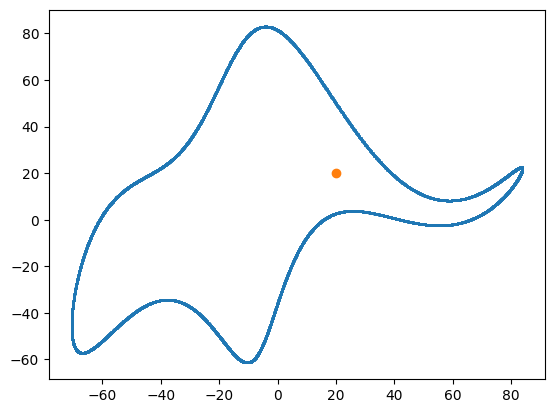

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [0, 0],
    [0, -60],
    [0, 0],
    [12, 0],
    [0, 0],
    [-14, 0],
])

B = np.array([
    [0, 0],
    [50, -30],
    [18, 8],
    [0, -10],
    [0, 0],
    [0, 0],
])


t = np.linspace(0, 100, 10000)

x = 0
y = 0

for k in range(6):
    x += A[k, 0] * np.cos(k*t) + B[k, 0] * np.sin(k*t)
    y += A[k, 1] * np.cos(k*t) + B[k, 1] * np.sin(k*t)

plt.scatter(y, -x, s=1)
plt.scatter(20, 20)

Equation for a parametric function
$$ \begin{cases}
x = f(t) \\
y = g(t)
\end{cases}
$$

- Left: the equation of a circle is ($t\in[0, 2\pi]$)
$$\begin{cases}
x = cos(t)\\
y=sin(t)
\end{cases}$$
- Right: one day, physicist Enrico Fermi joked that he was certain one could draw an elephant with only 4 parameters (!)
    - https://aapt.scitation.org/doi/10.1119/1.3254017
    - https://www.johndcook.com/blog/2011/06/21/how-to-fit-an-elephant/

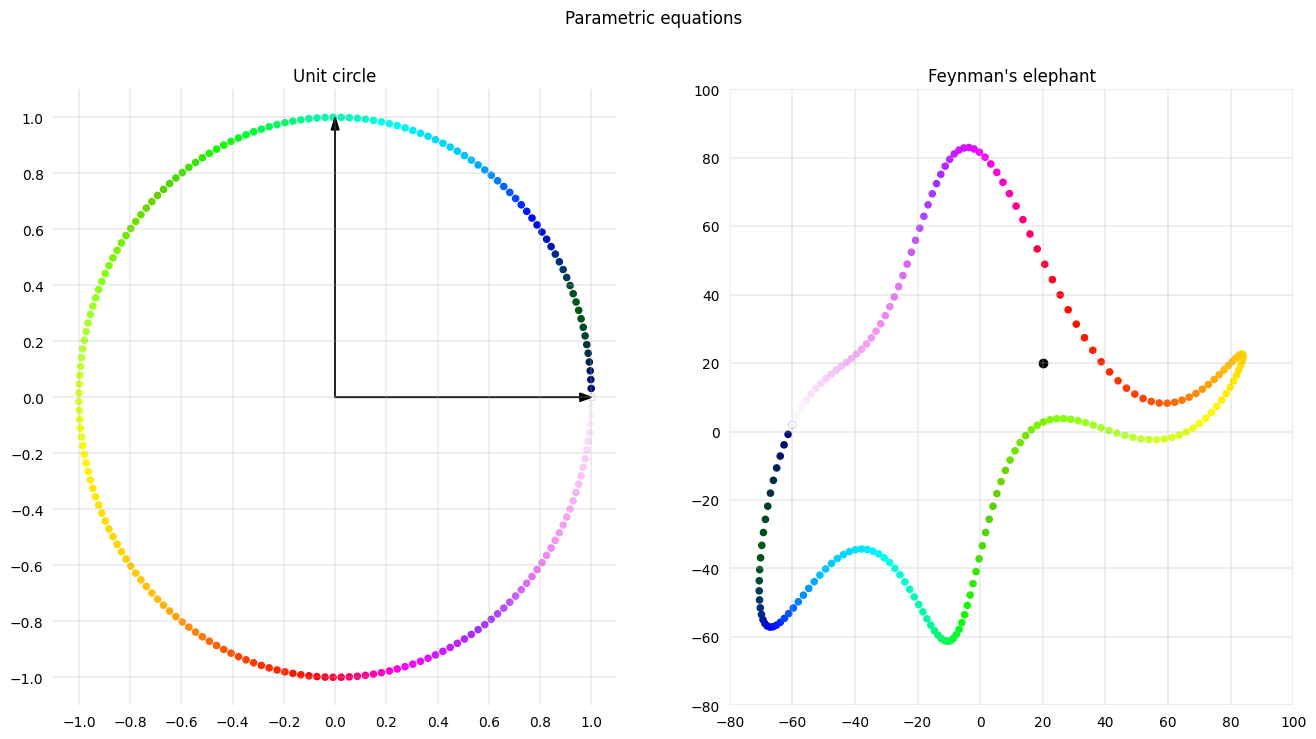

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def quick_format():
    ax = plt.gca()
    for key, spine in ax.spines.items():
        spine.set(visible=False)
    plt.tick_params(bottom=False, left=False)
    plt.grid(lw=0.3)

def plot_circle():
    t = np.linspace(0, 2 * np.pi, 200)
    x = np.cos(t)
    y = np.sin(t)
    plt.scatter(x, y, s=20, c=t, cmap='gist_ncar')
    plt.xticks(np.linspace(-1, 1, num=11))
    plt.yticks(np.linspace(-1, 1, num=11))
    plt.arrow(0, 0, 0, 1, length_includes_head=True, head_width=0.03, color='k')
    plt.arrow(0, 0, 1, 0, length_includes_head=True, head_width=0.03, color='k')
    
def plot_elephant():
    A = np.array([ [0, 0], [0, -60],  [0, 0],  [12, 0],  [0, 0], [-14, 0],])
    B = np.array([ [0, 0], [50, -30], [18, 8], [0, -10], [0, 0], [0, 0],])

    t = np.linspace(0, 2 * np.pi, 200)
    x = 0
    y = 0
    for k in range(6):
        x += A[k, 0] * np.cos(k*t) + B[k, 0] * np.sin(k*t)
        y += A[k, 1] * np.cos(k*t) + B[k, 1] * np.sin(k*t)

    plt.scatter(y, -x, s=20, c=t, cmap='gist_ncar')
    plt.scatter(20, 20, c='k')
    
    plt.xticks(np.linspace(-80, 100, num=10))
    plt.yticks(np.linspace(-80, 100, num=10))
    quick_format()
    
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
axi = axs.flat
plt.sca(next(axi))
plot_circle()
quick_format()
plt.title("Unit circle")

plt.sca(next(axi))
plot_elephant()
quick_format()
plt.title("Feynman's elephant")

plt.suptitle("Parametric equations")
plt.savefig("tmp/parametric_equations.svg")

```python
# elephant parameters
p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece

def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    x = np.append(fourier(t,Cx), [-p5.imag])
    y = np.append(fourier(t,Cy), [p5.imag])

    return x,y

x, y = elephant(np.linspace(0,2*np.pi,1000), p1, p2, p3, p4, p5)
pylab.plot(y,-x,'.')
pylab.show()
```